In [ ]:
import pandas as pd
import numpy as np


In [ ]:
salesData = pd.read_csv('dunnhumby_breakfast.csv')
salesData['WEEK_END_DATE'] = pd.to_datetime(salesData['WEEK_END_DATE'], format="%d-%b-%y")
salesData['UPC'] = salesData['UPC'].astype(pd.Int64Dtype())

In [118]:
salesCereals = salesData.loc[(salesData['Sub-Category']=='ALL FAMILY CEREAL') & (salesData['STORE_NUM']==367) \
                            & (salesData['WEEK_END_DATE']>='2009-01-01')]
#print(salesCereals)

salesCereals['SUMPRICE'] = salesCereals['PRICE'].groupby(salesCereals['WEEK_END_DATE']).transform('sum')
salesCereals['COUNTPRICE'] = salesCereals['PRICE'].groupby(salesCereals['WEEK_END_DATE']).transform('count')
salesCereals['AVGPRICE'] = salesCereals['SUMPRICE']/salesCereals['COUNTPRICE']
salesCereals['RELPRICE'] = salesCereals['PRICE']/salesCereals['AVGPRICE']
print(salesCereals)
salesCereals.to_csv('./salesCereals.csv')

D:\Anaconda3\envs\pyomov2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda3\envs\pyomov2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\envs\pyomov2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

       WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS   HHS   SPEND  \
6         2009-01-14      367.0  1111085319   14.0    13.0  13.0   26.32   
8         2009-01-14      367.0  1111085350   35.0    27.0  25.0   69.30   
12        2009-01-14      367.0  1600027527   12.0    10.0  10.0   38.28   
13        2009-01-14      367.0  1600027528   31.0    26.0  19.0  142.29   
14        2009-01-14      367.0  1600027564   56.0    48.0  42.0  152.32   
16        2009-01-14      367.0  3000006340   19.0    17.0  17.0   38.76   
21        2009-01-14      367.0  3800031829   14.0    11.0   3.0   43.96   
3163      2009-01-21      367.0  1111085319   12.0    12.0  12.0   22.68   
3165      2009-01-21      367.0  1111085350   33.0    25.0  25.0   66.00   
3169      2009-01-21      367.0  1600027527    7.0     7.0   7.0   22.33   
3170      2009-01-21      367.0  1600027528   24.0    19.0  11.0  110.16   
3171      2009-01-21      367.0  1600027564   36.0    23.0  23.0   96.48   
3173      20

In [119]:
#print(sales_data)
print(salesCereals.groupby('UPC').count())
productList = salesCereals['UPC'].unique()
print(productList)

            WEEK_END_DATE  STORE_NUM  UNITS  VISITS  HHS  SPEND  PRICE  \
UPC                                                                      
1111085319            156        156    156     156  156    156    156   
1111085350            156        156    156     156  156    156    156   
1600027527            156        156    156     156  156    156    156   
1600027528            156        156    156     156  156    156    156   
1600027564            155        155    155     155  155    155    155   
3000006340            133        133    133     133  133    133    133   
3800031829            155        155    155     155  155    155    155   

            BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  Desc  Category  \
UPC                                                                  
1111085319         156      156      156       156   156       156   
1111085350         156      156      156       156   156       156   
1600027527         156      156      156       156   

In [163]:
feature_list = ['PRICE', 'FEATURE', 'DISPLAY','TPR_ONLY','RELPRICE']
X_train, X_test = {}, {}
y_train, y_test, y_pred = {}, {}, {}


for k in productList:
    productDataSize = len(salesCereals.loc[salesCereals['UPC']==k][feature_list].values)
    
    train_size = int(productDataSize * 0.75)
    print("N.Points[" + str(k) + "]:" + str(productDataSize)+", N.TrainPoints[" + str(k) + "]:" + str(train_size))

    X_train[k] = salesCereals.loc[salesCereals['UPC']==k][feature_list].values[0:train_size]
    X_test[k] = salesCereals.loc[salesCereals['UPC']==k][feature_list].values[train_size:productDataSize]
    
    y_train[k] = salesCereals.loc[salesCereals['UPC']==k]['UNITS'].values[0:train_size]
    y_test[k] = salesCereals.loc[salesCereals['UPC']==k]['UNITS'].values[train_size:productDataSize]

N.Points[1111085319]:156, N.TrainPoints[1111085319]:117
N.Points[1111085350]:156, N.TrainPoints[1111085350]:117
N.Points[1600027527]:156, N.TrainPoints[1600027527]:117
N.Points[1600027528]:156, N.TrainPoints[1600027528]:117
N.Points[1600027564]:155, N.TrainPoints[1600027564]:116
N.Points[3000006340]:133, N.TrainPoints[3000006340]:99
N.Points[3800031829]:155, N.TrainPoints[3800031829]:116


In [164]:
#Tree model
from sklearn import tree
from sklearn.metrics import mean_absolute_error
import pickle

regr = {}

for k in productList:
      
    regr[k] = tree.DecisionTreeRegressor(max_depth = 5).fit(X_train[k],y_train[k])
    y_pred[k] = regr[k].predict(X_test[k])
    
    print("UPC:"+str(k))
    print("\tMAE:" + "{0:.2f}".format(mean_absolute_error(y_test[k], y_pred[k])))
    print("\tMAPE:" + "{0:.2f}".format(np.mean(np.abs((y_test[k] - y_pred[k]) / y_test[k]) * 100))+'%')
    
    print("\tFeature importance")
    for i in range(len(feature_list)):
        print("\t\t"+str(feature_list[i])+':'+"{0:.2f}".format(regr[k].feature_importances_[i]*100)+'%')
        
    # save the model to disk
    filename = './'+str(k)+'_tree_model.sav'
    pickle.dump(regr[k], open(filename, 'wb'))

UPC:1111085319
	MAE:6.56
	MAPE:70.73%
	Feature importance
		PRICE:20.40%
		FEATURE:0.32%
		DISPLAY:0.00%
		TPR_ONLY:10.83%
		RELPRICE:68.45%
UPC:1111085350
	MAE:7.12
	MAPE:105.02%
	Feature importance
		PRICE:35.65%
		FEATURE:0.55%
		DISPLAY:35.71%
		TPR_ONLY:0.00%
		RELPRICE:28.08%
UPC:1600027527
	MAE:16.29
	MAPE:125.57%
	Feature importance
		PRICE:16.42%
		FEATURE:0.00%
		DISPLAY:73.16%
		TPR_ONLY:0.00%
		RELPRICE:10.42%
UPC:1600027528
	MAE:7.51
	MAPE:23.41%
	Feature importance
		PRICE:76.31%
		FEATURE:0.00%
		DISPLAY:2.80%
		TPR_ONLY:0.00%
		RELPRICE:20.88%
UPC:1600027564
	MAE:6.82
	MAPE:19.86%
	Feature importance
		PRICE:12.84%
		FEATURE:49.84%
		DISPLAY:13.91%
		TPR_ONLY:0.00%
		RELPRICE:23.40%
UPC:3000006340
	MAE:5.44
	MAPE:186.49%
	Feature importance
		PRICE:20.57%
		FEATURE:0.00%
		DISPLAY:0.00%
		TPR_ONLY:0.00%
		RELPRICE:79.43%
UPC:3800031829
	MAE:7.66
	MAPE:31.50%
	Feature importance
		PRICE:21.03%
		FEATURE:0.21%
		DISPLAY:55.29%
		TPR_ONLY:0.00%
		RELPRICE:23.47%


In [111]:
from dtreeviz.trees import *
from IPython.display import Image

for k in productList[:3]:
    viz = dtreeviz(regr[k],
                   X_train[k],
                   y_train[k],
                   target_name='Sales',
                   feature_names=np.array(feature_list))

    viz.save("./"+str(k)+".svg")
    

In [85]:
k = productList[0]

viz = dtreeviz(regr[k],
               X_train[k],
               y_train[k],
               target_name='Sales',
               feature_names=np.array(feature_list),
              X = X_train[k][0])

viz.save("./"+str(k)+"_data_sample.svg")

In [165]:
#Linear model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import pickle

regr = {}

for k in productList:
      
    regr[k] = linear_model.LinearRegression().fit(X_train[k],y_train[k])
    
    y_pred[k] = regr[k].predict(X_test[k])
    print("UPC:"+str(k))
    print("\tMAE:" + "{0:.2f}".format(mean_absolute_error(y_test[k], y_pred[k])))
    print("\tMAPE:" + "{0:.2f}".format(np.mean(np.abs((y_test[k] - y_pred[k]) / y_test[k]) * 100))+'%')
    
    print("\tRegression parameters")
    
    print("\t\t"+str('çonstant')+':'+"{0:.2f}".format(regr[k].intercept_))
    for i in range(len(feature_list)):
        print("\t\t"+str(feature_list[i])+':'+"{0:.2f}".format(regr[k].coef_[i]))
        
    filename = './'+str(k)+'_linear_model.sav'
    pickle.dump(regr[k], open(filename, 'wb'))

UPC:1111085319
	MAE:7.04
	MAPE:66.84%
	Regression parameters
		çonstant:52.22
		PRICE:-15.55
		FEATURE:2.25
		DISPLAY:0.00
		TPR_ONLY:4.04
		RELPRICE:-14.39
UPC:1111085350
	MAE:6.51
	MAPE:97.37%
	Regression parameters
		çonstant:48.23
		PRICE:-22.73
		FEATURE:7.29
		DISPLAY:17.87
		TPR_ONLY:0.56
		RELPRICE:25.34
UPC:1600027527
	MAE:16.45
	MAPE:69.92%
	Regression parameters
		çonstant:45.08
		PRICE:-23.58
		FEATURE:27.43
		DISPLAY:72.15
		TPR_ONLY:-4.61
		RELPRICE:40.90
UPC:1600027528
	MAE:10.56
	MAPE:32.44%
	Regression parameters
		çonstant:222.67
		PRICE:-34.99
		FEATURE:-7.93
		DISPLAY:-15.74
		TPR_ONLY:0.00
		RELPRICE:-23.30
UPC:1600027564
	MAE:5.74
	MAPE:18.23%
	Regression parameters
		çonstant:21.60
		PRICE:1.00
		FEATURE:14.77
		DISPLAY:16.13
		TPR_ONLY:0.82
		RELPRICE:-3.06
UPC:3000006340
	MAE:2.69
	MAPE:96.27%
	Regression parameters
		çonstant:11.73
		PRICE:-4.83
		FEATURE:10.09
		DISPLAY:3.14
		TPR_ONLY:3.05
		RELPRICE:7.56
UPC:3800031829
	MAE:6.92
	MAPE:29.86%
	Regression par

In [153]:
import matplotlib.pyplot as plt

#See https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

def plot(data_x, data_y, X_test, y_pred, feature_list):
    # Plot the results

    n_row_plot = int((len(feature_list)+1)/2) # 2 plots per row
    n_col_plot = 2
    fig, ax = plt.subplots(n_row_plot, n_col_plot, figsize=(12, 12))
    
    i = 0 # column index of the plot
    j = 0 # row index of the plot
        
    for count in range(len(feature_list)):
        #print(data_x[:,i])
        ax[j, i].scatter(data_x[:,min(count,len(feature_list))], data_y, s=20, edgecolor="black",
                    c="darkorange", label="data")
        ax[j, i].scatter(X_test[:,min(count,len(feature_list))], y_pred, s=30, marker="X", 
                    c="royalblue", label="prediction")
        ax[j, i].set(title=feature_list[count])
        
        ax[j, i].set(ylabel='UNITS')
            
        i = min(i+1,len(feature_list)) % n_col_plot
        if i == 0: j += 1

    plt.show()

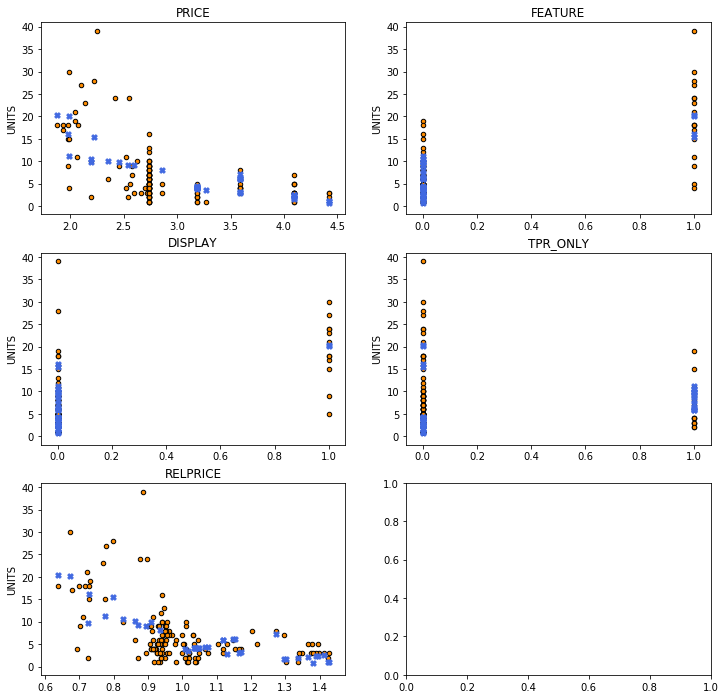

In [155]:
# Plot prediction results for a product (UPC)
k = productList[5]
data_y = salesCereals.loc[salesCereals['UPC']==k]['UNITS'].values
data_x = salesCereals.loc[salesCereals['UPC']==k][feature_list].values

plot(data_x, data_y, X_test[k], y_pred[k], feature_list)
